In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def z(x1,x2,w1,w2,b):
    return w1*x1+w2*x2+b

# 1. Weight and Bias

In [4]:
#weight and bias
#random.seed(0)
w11=random.random()
w12=random.random()
w21=random.random()
w22=random.random()
w1=random.random()
w2=random.random()
b1=random.random()
b2=random.random()
b3=random.random()
print (w11, w12, w21, w22, w1, w2)
print (b1, b2, b3)

0.47499491428551754 0.49994328549162714 0.6768603654480274 0.27110645420666957 0.6792174610581644 0.9856412491312712
0.7384351347020709 0.5705956079672723 0.47128715719462366


In [5]:
def loss(h31,h32,h33,h34): 
    
    return (h31**2+(h32-1)**2+(h33-1)**2+h34**2)

In [6]:
loss_array = []

# 2. Training

In [7]:
epoch = 100000
learning_rate = 0.3
scale = 1
for i in range(epoch):
    
    #Layer2
    z11=z(0,0,w11,w21,b1)
    z12=z(0,1,w11,w21,b1)
    z13=z(1,0,w11,w21,b1)
    z14=z(1,1,w11,w21,b1)
    z21=z(0,0,w12,w22,b2)
    z22=z(0,1,w12,w22,b2)
    z23=z(1,0,w12,w22,b2)
    z24=z(1,1,w12,w22,b2)
    h11=sigmoid(z11*scale)
    h12=sigmoid(z12*scale)
    h13=sigmoid(z13*scale)
    h14=sigmoid(z14*scale)
    h21=sigmoid(z21*scale)
    h22=sigmoid(z22*scale)
    h23=sigmoid(z23*scale)
    h24=sigmoid(z24*scale)
    
    #Output Layer
    z31=z(h11,h21,w1,w2,b3)
    z32=z(h12,h22,w1,w2,b3)
    z33=z(h13,h23,w1,w2,b3)
    z34=z(h14,h24,w1,w2,b3)
    h31=sigmoid(z31)
    h32=sigmoid(z32)
    h33=sigmoid(z33)
    h34=sigmoid(z34)
    
    #loss
    
    cost = loss(h31,h32,h33,h34)
    loss_array.append(cost)
    #d1
    d11=h31*(1-h31)*(h31)
    d12=h32*(1-h32)*(h32-1)
    d13=h33*(1-h33)*(h33-1)
    d14=h34*(1-h34)*h34
    
    #dw-Layer2
    #(0,0)
    dw211=d11*h11
    dw212=d11*h21
    #(0,1)
    dw221=d12*h12
    dw222=d12*h22
    #(1,0)
    dw231=d13*h13
    dw232=d13*h23
    #(1,1)
    dw241=d14*h14
    dw242=d14*h24
    
    #d2
    #(0,0)
    d211=d11*w1
    d212=d11*w2
    #(0,1)
    d221=d12*w1
    d222=d12*w2
    #(1,0)
    d231=d13*w1
    d232=d13*w2
    #(1,1)
    d241=d14*w1
    d242=d14*w2
    
    #d3
    d311=d211*h11*(1-h11)
    d312=d212*h21*(1-h21)
    d321=d221*h12*(1-h12)
    d322=d222*h22*(1-h22)
    d331=d231*h13*(1-h13)
    d332=d232*h23*(1-h23)
    d341=d241*h14*(1-h14)
    d342=d242*h24*(1-h24)
    
    #dw-Layer1 ,(w11, w21, w12, w22)
    #(0,0)
    dw1111=d311*0
    dw1112=d311*0
    dw1121=d312*0
    dw1122=d312*0
    #(0,1)
    dw1211=d321*0
    dw1212=d321*1
    dw1221=d322*0
    dw1222=d322*1
    #(1,0)
    dw1311=d331*1
    dw1312=d331*0
    dw1321=d332*1
    dw1322=d332*0
    #(1,1)
    dw1411=d341*1
    dw1412=d341*1
    dw1421=d342*1
    dw1422=d342*1
    

    #weight update
    w11=w11-learning_rate*(dw1111+dw1211+dw1311+dw1411)/4
    w21=w21-learning_rate*(dw1112+dw1212+dw1312+dw1412)/4
    w12=w12-learning_rate*(dw1121+dw1221+dw1321+dw1421)/4
    w22=w22-learning_rate*(dw1122+dw1222+dw1322+dw1422)/4
    w1=w1-learning_rate*(dw211+dw221+dw231+dw241)/4
    w2=w2-learning_rate*(dw212+dw222+dw232+dw242)/4
    b1=b1-learning_rate*(d311+d321+d331+d341)/4
    b2=b2-learning_rate*(d312+d322+d332+d342)/4
    b3=b3-learning_rate*(d11+d12+d13+d14)/4
    
    if (i%(epoch/10) == 0):
        print('epoch :',i,'loss :',cost)
        print('pridict :', '(0,0):', h31, '(0,1):', h32, '(1,0):', h33, '(1,1):', h34)
    if (i == epoch-1):
        print('epoch :',i,'loss :',cost)
        print('pridict :', '(0,0):', h31, '(0,1):', h32, '(1,0):', h33, '(1,1):', h34)

epoch : 0 loss : 1.47456218095
pridict : (0,0): 0.826440702888 (0,1): 0.846391485955 (1,0): 0.849272422651 (1,1): 0.863274908357
epoch : 10000 loss : 0.479142402727
pridict : (0,0): 0.118146811888 (0,1): 0.680741878171 (1,0): 0.677512922366 (1,1): 0.509175873322
epoch : 20000 loss : 0.00890464279246
pridict : (0,0): 0.0475981210926 (0,1): 0.954538820005 (1,0): 0.954542636963 (1,1): 0.0500596735913
epoch : 30000 loss : 0.00404280647718
pridict : (0,0): 0.0334663391474 (0,1): 0.969541941383 (1,0): 0.969544231033 (1,1): 0.0326735890771
epoch : 40000 loss : 0.00258133360875
pridict : (0,0): 0.027188740348 (0,1): 0.975720252469 (1,0): 0.975721924073 (1,1): 0.0257521823564
epoch : 50000 loss : 0.00188606944302
pridict : (0,0): 0.0234566177341 (0,1): 0.979274659855 (1,0): 0.979275992198 (1,1): 0.0218364901933
epoch : 60000 loss : 0.00148180187881
pridict : (0,0): 0.0209176635727 (0,1): 0.981646558314 (1,0): 0.981647674363 (1,1): 0.0192508844336
epoch : 70000 loss : 0.00121823748525
pridict : 

# 3. Result

In [8]:
print('pridict :', '(0,0):', '{0:.6f}'.format(h31), '(0,1):', '{0:.6f}'.format(h32)
      , '(1,0):', '{0:.6f}'.format(h33), '(1,1):', '{0:.6f}'.format(h34))

pridict : (0,0): 0.015473 (0,1): 0.986618 (1,0): 0.986618 (1,1): 0.013904


In [9]:
print([round(h31),round(h32),round(h33),round(h34)])

[0.0, 1.0, 1.0, 0.0]


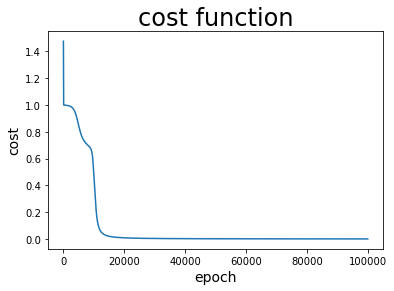

In [10]:
plt.plot(loss_array);
plt.title('cost function',fontsize =24);
plt.xlabel('epoch',fontsize=14);
plt.ylabel('cost',fontsize=14);